In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

In [2]:
ID = 151
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

#151 run on antibiasL, L is correct, R is incorrect

# Load sessions

In [3]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasL = sessions[(sessions.SessionType == 'antibiasL')]
sessions = (pd.concat([unbiased,antibiasL])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
41        151          55    unbiased
42        151          61    unbiased
43        151          68   antibiasL
44        151          72   antibiasL
45        151          76   antibiasL
46        151          80    unbiased
47        151          84    unbiased


In [4]:
summary = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals]
#Load all sessions for an animal

In [5]:
mean_trials =  np.mean([(len(x))for x in summary])

In [6]:
unbiased_idx = [0,1,5,6]
antibias_idx = [2,3,4]
len(summary[0])

137

In [7]:
summary = [mvr.correctR(x) for x in summary]    

# Create dot plot

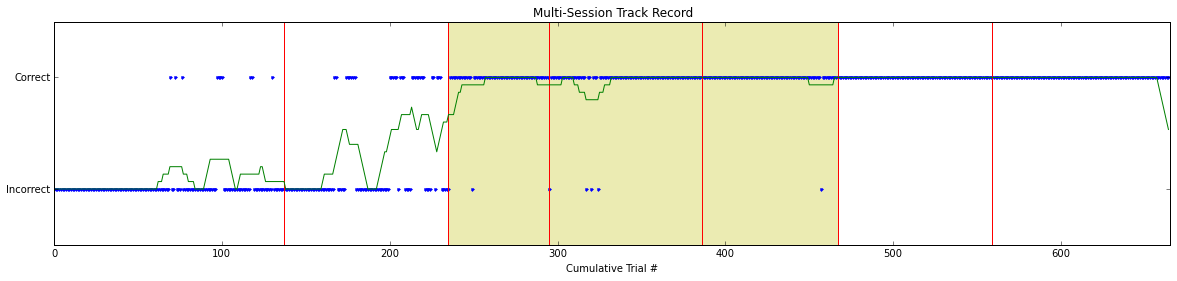

In [8]:
#Plot Correct Track Record acros all sessions
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')

avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

682 682


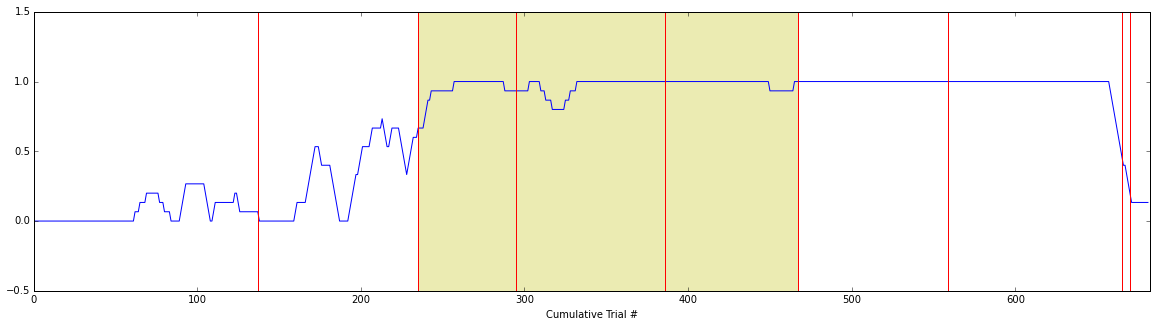

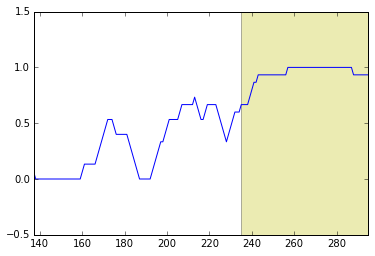

In [27]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
#for i in range(len(dot_array)):
#    avgs.append(np.mean(dot_array[i:i+binsize]))
print len(avgs), len(dot_array)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[0],len_array[2])
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)

zoom = avgs[len_array[1]-40:len_array[1]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg151.csv")


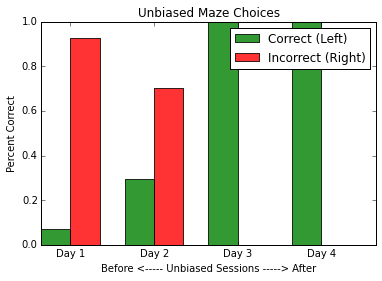

In [10]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in unbiased_idx:
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ('Day 1', 'Day 2', 'Day 3', 'Day 4')  #Unbiased days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Before <----- Unbiased Sessions -----> After')
plt.ylabel('Percent Correct')
plt.title('Unbiased Maze Choices')
plt.show()

# Plot Animal Performance

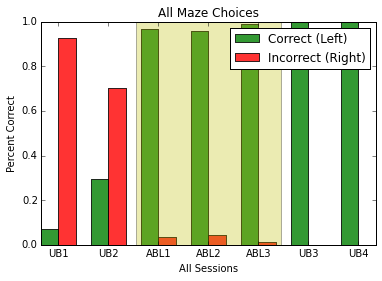

0.184455534038 0.970121647899 1.0


In [11]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(7):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.show()

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# Time stats

[9.222875912408758, 11.762693877551023, 20.25176666666666, 14.574439560439554, 15.10832098765432, 13.193608695652175, 11.5938679245283]


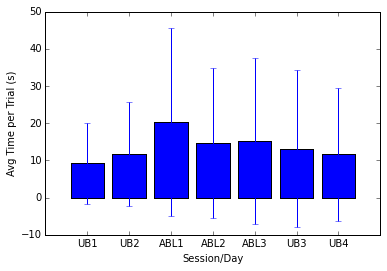

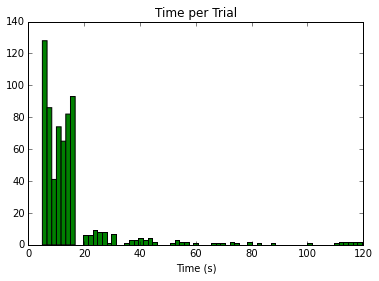

In [12]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)
labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
t = []
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[1.9671678832116786, 4.075510204081633, 3.8211666666666657, 2.201555555555555, 1.6812839506172839, 1.4136483516483513, 1.4013396226415094]
[1.6080740881808195, 11.26619118236624, 9.205947998333608, 2.9741534046526574, 2.3173853652045433, 0.8765875550315219, 0.6728008675436405]


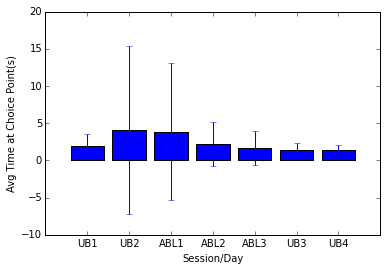

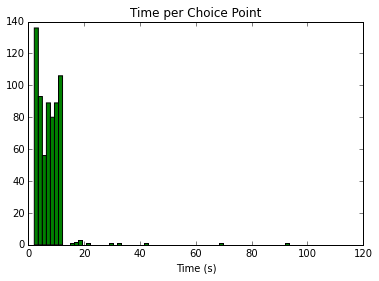

In [13]:
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')
            
plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            

0      5.820
1      1.638
2      2.170
3      1.516
4      1.790
5      1.486
6      2.090
7      1.418
8      1.686
9      0.966
10     1.646
11     1.256
12     1.816
13     1.654
14     1.958
15     1.362
16     2.410
17     1.810
18     1.160
19     1.624
20     1.766
21     1.414
22     2.032
23     1.980
24     3.038
25     6.686
26     1.730
27     1.516
28     1.538
29     3.638
       ...  
61     1.148
62     2.418
63     1.724
64     1.004
65     1.564
66     1.436
67     1.588
68     1.452
69     0.974
70     1.400
71     2.224
72     1.372
73     1.914
74     1.332
75     1.482
76     1.918
77     1.206
78     1.412
79     1.224
80     1.330
81     2.090
82    28.808
83     1.198
84     2.158
85       NaN
86     1.050
87     1.422
88     4.162
89     2.022
90     1.232
Name: timeChoice, dtype: float64


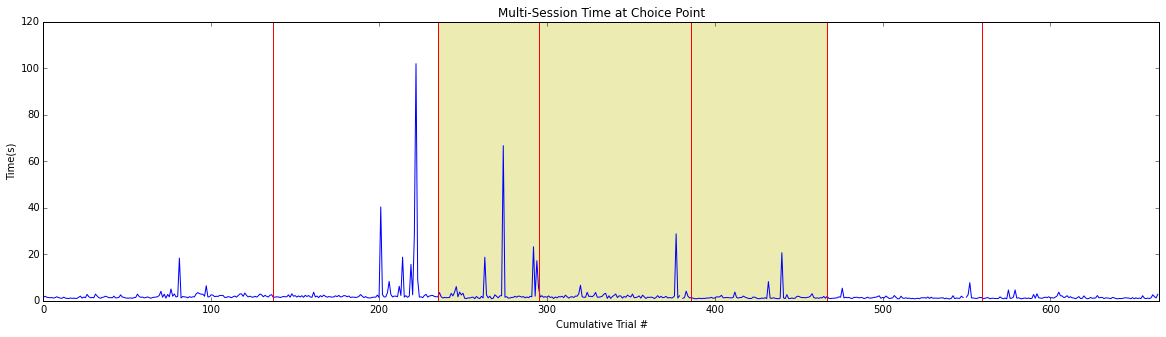

In [14]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')

plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')

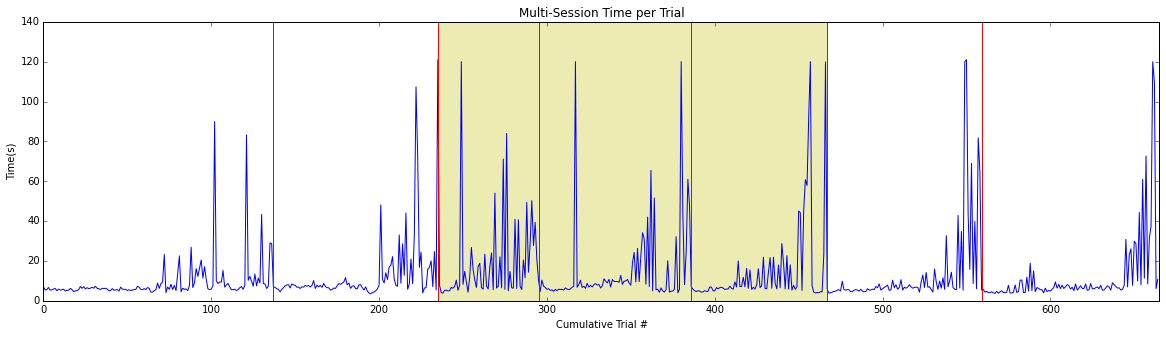

In [15]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')

plt.title('Multi-Session Time per Trial')

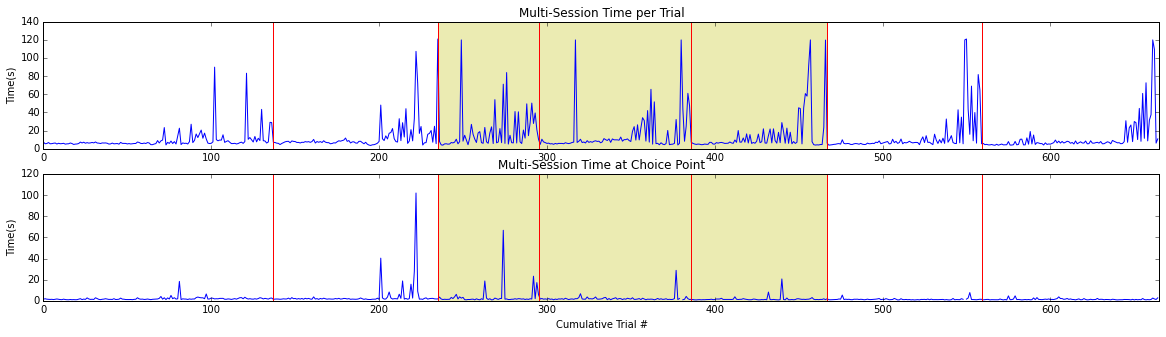

In [16]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')

9


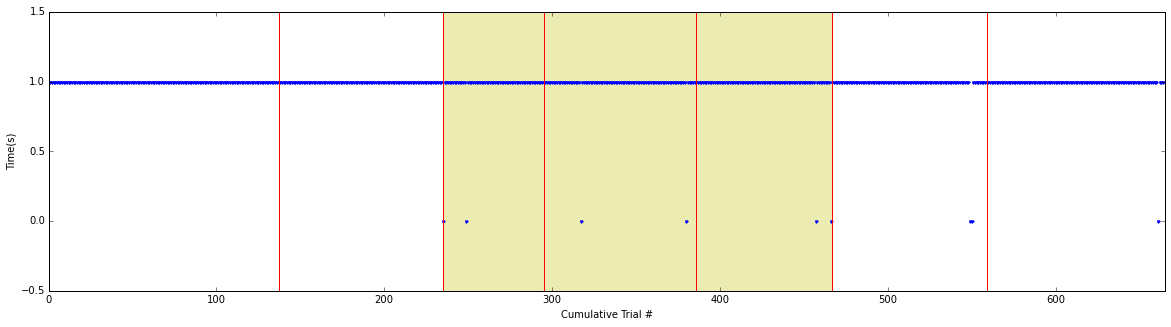

In [17]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')

num_incomplete = completion.count(0)
print num_incomplete

In [18]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)
    
print num_deadend

4


In [19]:
#Summary vals for all of an animal's sessions
animal_summary = {'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoice': np.nanmean(tchoice_array),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctAfter' : mu_perc_corrUB_after,
                  'Animal' :151,}

In [20]:
animal_summary = pd.Series(animal_summary)

In [21]:
animal_summary.to_csv( path + "/animalsummary151.csv")

In [22]:
animal_summary

Animal             151.000000
correctAfter         1.000000
correctAntibias      0.970122
correctBefore        0.184456
incomplete           9.000000
meanChoice           2.277044
meanNumTrials       95.000000
meanTime            12.968713
numDays              7.000000
totalDeadEnd         4.000000
dtype: float64

# Add pro-bias session analysis

In [23]:
logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_extraswitch_log.xlsx'
extralog = pd.read_excel(logpath)
extralog

extra_sessions = extralog[(extralog.AnimalNum == 151)]
#unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = extra_sessions[(extra_sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasL,antibiasR])).sort(columns = 'SessionNum')
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
41        151          55    unbiased
42        151          61    unbiased
43        151          68   antibiasL
44        151          72   antibiasL
45        151          76   antibiasL
46        151          80    unbiased
47        151          84    unbiased
7         151          89   antibiasR
8         151          90   antibiasR


In [24]:
summary_extra = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals[-2:]]


summary_extra = [mvr.correctL(x) for x in summary_extra]
summary+=summary_extra

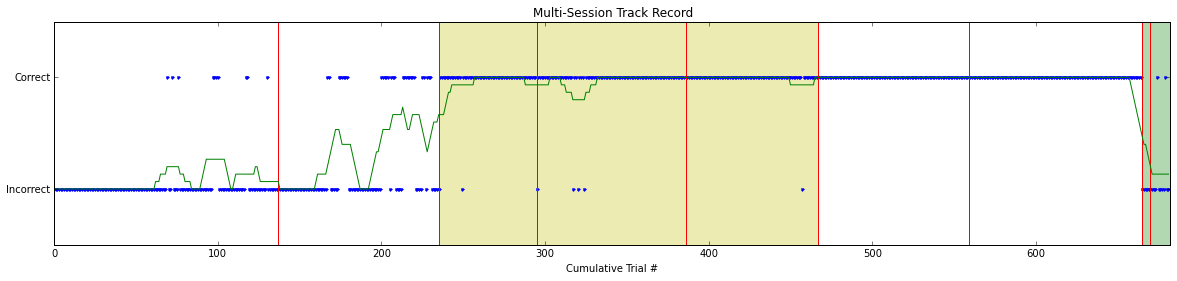

In [25]:
#Plot Correct Track Record acros all sessions (main behavior)
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[6],len_array[8], facecolor = 'g', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 